In [79]:
import pandas as pd

# 加载数据集
data_path = './data.csv'
data = pd.read_csv(data_path)

# 预览数据集的前几行
data.head()

,year,X1,X2,X3,X4,X5,X6,Y
0,1970,36.46,11.35,5.72,85.07,105.90,25.95,822534450
1,1971,34.95,10.63,5.43,80.70,105.82,23.40,843285424
2,1972,33.44,9.90,5.14,76.32,105.78,22.27,862840403
3,1973,31.93,9.18,4.85,71.95,105.86,20.99,881652080
4,1974,30.04,8.77,4.48,68.56,105.88,17.57,899367640


数据预处理

In [80]:
from sklearn.preprocessing import StandardScaler

# 移除年份列
features = data.drop(['year', 'Y'], axis=1)

# 初始化标准化器
scaler = StandardScaler()

# 对特征进行标准化
features_standardized = scaler.fit_transform(features)

# 创建一个新的DataFrame来存储标准化后的数据
features_standardized_df = pd.DataFrame(features_standardized, columns=features.columns)

# 预览标准化后的数据集的前几行
features_standardized_df.head()

,X1,X2,X3,X4,X5,X6
0,2.614841,4.058772,3.014202,2.416204,0.280653,2.774237
1,2.390421,3.355718,2.750118,2.194172,0.181483,2.309091
2,2.166000,2.642899,2.486034,1.971632,0.131897,2.102968
3,1.941580,1.939844,2.221949,1.749600,0.231068,1.869483
4,1.660682,1.539494,1.885015,1.577360,0.255861,1.245641


In [81]:
from sklearn.model_selection import train_test_split

Y = data['Y']

# 标准化Y
scaler_Y = StandardScaler()
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

# 使用train_test_split函数划分数据集
X_train, X_test, y_train, y_test = train_test_split(features_standardized_df, Y_scaled, test_size=0.3, random_state=42)

构建BP模型

In [82]:
import torch
from torch import nn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import math
import matplotlib.pyplot as plt

# 转换数据为PyTorch Tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 定义模型
class BPNN(nn.Module):
    def __init__(self):
        super(BPNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(6, 100),  # 确保input_size匹配您的特征数
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )
        
    def forward(self, x):
        return self.network(x)

# 实例化模型
model = BPNN()

# 损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 训练模型
# 训练模型并记录损失
losses = []
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# 评估模型
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    # 确保预测值和真实值的形状匹配
    predictions_np = predictions.numpy().flatten()
    y_test_np = y_test.flatten()

    # 计算MSE
    mse = mean_squared_error(y_test_np, predictions_np)
    print(f'Test MSE: {mse}')

    # 计算RMSE
    rmse = math.sqrt(mse)
    print(f'Test RMSE: {rmse}')

    # 计算MAE
    mae = mean_absolute_error(y_test_np, predictions_np)
    print(f'Test MAE: {mae}')

    # 计算R²分数
    r2 = r2_score(y_test_np, predictions_np)
    print(f'Test R²: {r2}')

    # 计算解释方差分数
    explained_variance = explained_variance_score(y_test_np, predictions_np)
    print(f'Test Explained Variance: {explained_variance}')

Epoch 1, Loss: 1.0341227054595947
Epoch 2, Loss: 0.9985990524291992
Epoch 3, Loss: 0.7279334664344788
Epoch 4, Loss: 0.17033879458904266
Epoch 5, Loss: 3.5646848678588867
Epoch 6, Loss: 0.11798954010009766
Epoch 7, Loss: 0.3347916603088379
Epoch 8, Loss: 0.5796469449996948
Epoch 9, Loss: 0.6919130682945251
Epoch 10, Loss: 0.7425768971443176
Epoch 11, Loss: 0.7642415165901184
Epoch 12, Loss: 0.759555459022522
Epoch 13, Loss: 0.7318069934844971
Epoch 14, Loss: 0.6875107884407043
Epoch 15, Loss: 0.633464515209198
Epoch 16, Loss: 0.5792434811592102
Epoch 17, Loss: 0.5299844741821289
Epoch 18, Loss: 0.5171228647232056
Epoch 19, Loss: 0.5425412058830261
Epoch 20, Loss: 0.5152336359024048
Epoch 21, Loss: 0.4769963324069977
Epoch 22, Loss: 0.5026884078979492
Epoch 23, Loss: 0.44910064339637756
Epoch 24, Loss: 0.42678770422935486
Epoch 25, Loss: 0.41901347041130066
Epoch 26, Loss: 0.38700252771377563
Epoch 27, Loss: 0.3482220470905304
Epoch 28, Loss: 0.326332688331604
Epoch 29, Loss: 0.28851658

绘制损失曲线

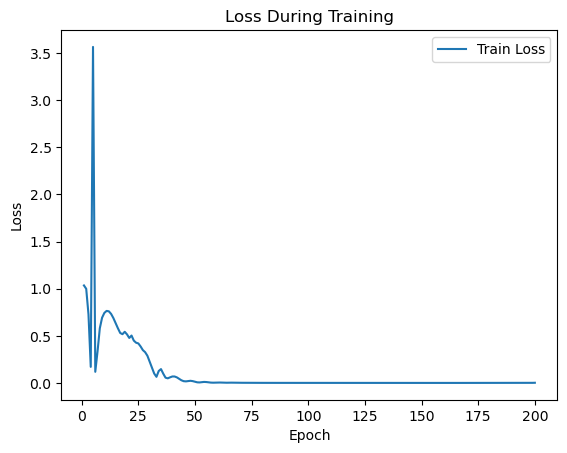

In [83]:
# 绘制损失曲线
plt.plot(range(1, epochs + 1), losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.legend()
plt.savefig('./结果/loss.png')
plt.show()

转换为原始尺度的数据

In [84]:
import numpy
# 将预测结果转换回原始尺度
predictions_original = scaler_Y.inverse_transform(predictions.numpy())
y_test_original = scaler_Y.inverse_transform(y_test)

结果可视化

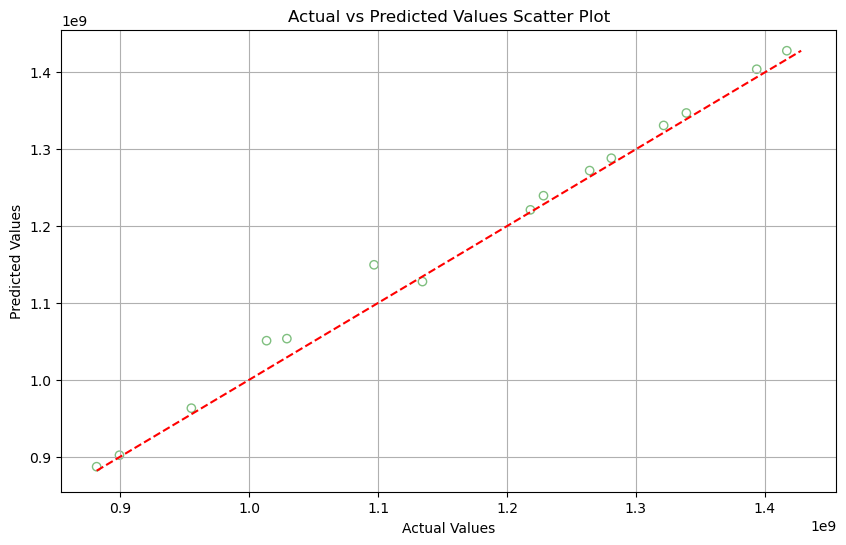

In [85]:
# 绘制真实值VS预测值散点图
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, predictions_original, color='green', marker='o', alpha=0.5, facecolors='none')
plt.plot(
    [min(y_test_original.min(), predictions_original.min()), max(y_test_original.max(), predictions_original.max())],
    [min(y_test_original.min(), predictions_original.min()), max(y_test_original.max(), predictions_original.max())],
    color='red', linestyle='--')  # 添加红色对角线
plt.title('Actual vs Predicted Values Scatter Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.savefig('./结果/真实值VS预测值.png')
plt.show()


定义GM(1,1)模型

In [86]:
import numpy as np

# 定义GM(1,1)模型
class GM11Model:
    def __init__(self):
        self.alpha = None
        self.u = None

    def fit(self, X):
        # 累加生成
        X_cumsum = np.cumsum(X, axis=0)
        # 建立数据矩阵B和数据向量Y
        B = np.empty((len(X) - 1, 2))
        Y = np.empty((len(X) - 1, 1))
        for i in range(1, len(X)):
            B[i - 1, 0] = -0.5 * (X_cumsum[i] + X_cumsum[i - 1])
            B[i - 1, 1] = 1
            Y[i - 1, 0] = X[i]
        # 参数估计
        self.alpha, self.u = np.linalg.lstsq(B, Y, rcond=None)[0].flatten()

    def predict(self, n):
        # 预测n个数据
        X_pred = np.zeros(n)
        for i in range(n):
            X_pred[i] = (self.u / self.alpha) * (np.exp(self.alpha * (i + 1)) - np.exp(self.alpha * i))
        return X_pred

# 定义一个函数来对单个特征列应用GM(1,1)模型并进行预测
def gm11_predict(X, n_pred):
    model = GM11Model()
    model.fit(X.reshape(-1, 1))
    return model.predict(n_pred)

# 预测未来5个时间点的值
n_pred = 10
predictions = []

# 对数据集中的每个特征X1到X6进行GM(1,1)预测
for column in features_standardized_df.columns:
    pred = gm11_predict(features_standardized_df[column].values, n_pred)
    predictions.append(pred)

# 将预测结果转换为矩阵
predictions_matrix = np.array(predictions).T  # 转置以匹配预期的格式

print('GM输出矩阵：\n', predictions_matrix)
print("----------------------------------")
# 创建一个DataFrame来存储矩阵
predictions_matrix_df = pd.DataFrame(predictions_matrix)

# 指定保存路径（请根据您的实际需要调整文件路径和名称）
save_path_matrix = './结果/predictions_matrix.csv'

# 保存为CSV
predictions_matrix_df.to_csv(save_path_matrix, index=False)

print(f'GM输出矩阵已保存到 "{save_path_matrix}"')

GM输出矩阵：
 [[-0.30052689 -0.20200896 -0.29521875 -0.3430415  -0.01936633 -0.3338412 ]
 [-0.29503615 -0.19881786 -0.28957271 -0.3359875  -0.01932103 -0.32688722]
 [-0.28964573 -0.19567716 -0.28403465 -0.32907856 -0.01927584 -0.32007809]
 [-0.28435379 -0.19258608 -0.2786025  -0.32231168 -0.01923074 -0.3134108 ]
 [-0.27915854 -0.18954382 -0.27327425 -0.31568396 -0.01918576 -0.30688239]
 [-0.27405821 -0.18654963 -0.2680479  -0.30919252 -0.01914088 -0.30048997]
 [-0.26905106 -0.18360273 -0.2629215  -0.30283456 -0.0190961  -0.29423071]
 [-0.2641354  -0.18070238 -0.25789314 -0.29660735 -0.01905143 -0.28810182]
 [-0.25930955 -0.17784785 -0.25296095 -0.29050818 -0.01900687 -0.2821006 ]
 [-0.25457186 -0.17503842 -0.24812309 -0.28453443 -0.01896241 -0.27622439]]
----------------------------------
GM输出矩阵已保存到 "./结果/predictions_matrix.csv"


C:\Users\Ricco\AppData\Local\Temp\ipykernel_10152\4178286721.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  B[i - 1, 0] = -0.5 * (X_cumsum[i] + X_cumsum[i - 1])
C:\Users\Ricco\AppData\Local\Temp\ipykernel_10152\4178286721.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i - 1, 0] = X[i]


运用GM（1，1）模型输出的特征导入到BP神经网络中，进行预测

In [87]:
# 确保 predictions_matrix 来自之前的步骤
predictions_tensor = torch.tensor(predictions_matrix, dtype=torch.float32)

# 使用模型进行预测
model.eval()  # 确保模型处于评估模式
with torch.no_grad():  # 确保在这个过程中不计算梯度
    predictions_tensor = model(predictions_tensor)

# 将PyTorch张量转换为NumPy数组
predictions_numpy = predictions_tensor.numpy()

# 反标准化预测值
predictions_future = scaler_Y.inverse_transform(predictions_numpy)

print(f"未来{n_pred}年数据:\n", predictions_future)
print("----------------------------------")
# 创建一个DataFrame来存储预测值
predictions_df = pd.DataFrame(predictions_future, columns=['Predicted Values'])

# 指定保存路径（请根据您的实际需要调整文件路径和名称）
save_path = './结果/predicted_values.csv'

# 保存为CSV
predictions_df.to_csv(save_path, index=False)

print(f'未来{n_pred}年的预测数据已保存到 "{save_path}"')

未来10年数据:
 [[1.2344444e+09]
 [1.2332785e+09]
 [1.2321861e+09]
 [1.2311711e+09]
 [1.2301974e+09]
 [1.2292193e+09]
 [1.2282258e+09]
 [1.2272489e+09]
 [1.2262369e+09]
 [1.2252448e+09]]
----------------------------------
未来10年的预测数据已保存到 "./结果/predicted_values.csv"


绘制预测曲线

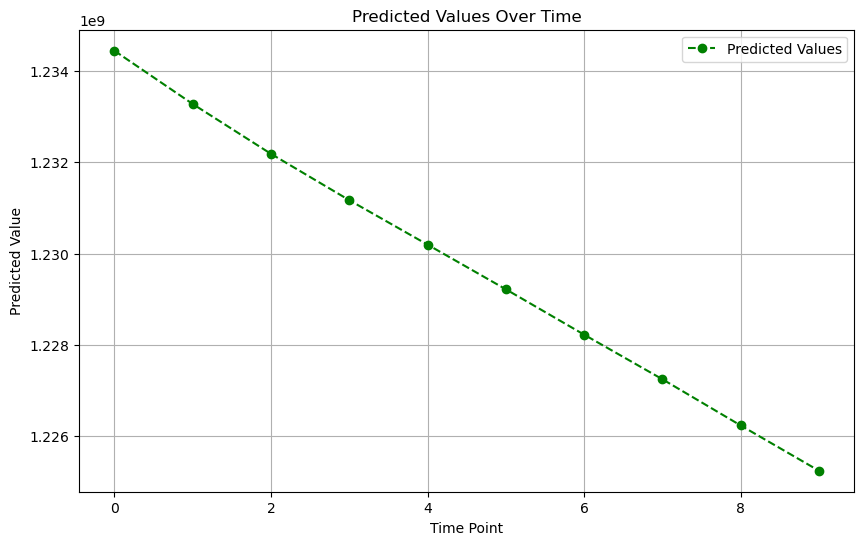

In [88]:
# 绘制预测结果的折线图
plt.figure(figsize=(10, 6))
plt.plot(predictions_future, label='Predicted Values', color='green', marker='o', linestyle='--')
plt.title('Predicted Values Over Time')
plt.xlabel('Time Point')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.savefig(f'./结果/未来{n_pred}年数据折线图.png')
plt.show()
